### 3.1. What is a Neural Network

### 3.1.1. Neural Network with a single Output

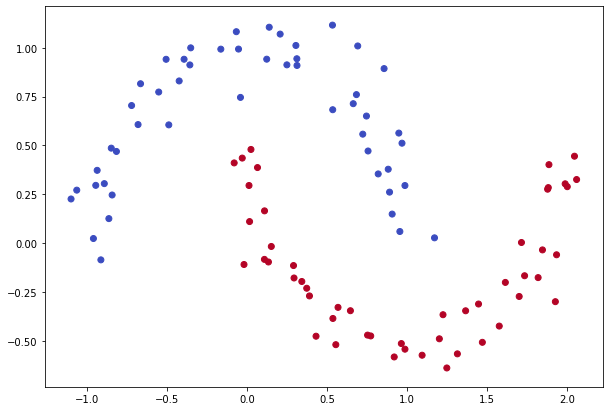

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X, y = datasets.make_moons(100, noise=0.10)
x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)


In [2]:
y = y.reshape(y.shape[0],1)

In [3]:
print(X.shape)
print(y.shape)


(100, 2)
(100, 1)


In [4]:
(100, 2)
(100, 1)


(100, 1)

In [5]:
def define_parameters(weights):
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1):
        
        w = np.random.randn(weights[i], weights[i+1])
        b = np.random.randn()

        weight_list.append(w)
        bias_list.append(b)
    
    return weight_list, bias_list


In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [7]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))


In [8]:
def predictions(w, b, X):
    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = sigmoid(zo)
    return ao


In [9]:
def find_cost(ao,y):
    m = y.shape[0]
    total_cost = (1/m) * np.sum(np.square(ao - y))
    return total_cost


In [10]:
def find_derivatives(w, b, X):

    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = sigmoid(zo)

    # Back propagation phase 1
    m = y.shape[0]
    dcost_dao = (1/m)*(ao-y)
    dao_dzo = sigmoid_der(zo)
    dzo_dwo = ah.T
   
    dwo =  np.dot(dzo_dwo, dcost_dao * dao_dzo)
    dbo = np.sum(dcost_dao * dao_dzo)
    
    # Back propagation phase 2
    
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah

    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = w[1].T

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)

    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)

    return dwh, dbh, dwo, dbo


In [11]:
def update_weights(w,b,dwh, dbh, dwo, dbo, lr):
    w[0] = w[0] - lr * dwh
    w[1] = w[1] - lr * dwo

    b[0] = b[0] - lr * dbh
    b[1] = b[1] - lr * dbo

    return w, b


In [12]:
def my_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w,b = define_parameters([input_len, 4, output_len])

    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )
        if i % 50 == 0 :
            print(cost)
            
    return w, b, error_list


In [13]:
lr = 0.5
epochs = 2000
w, b, error_list = my_neural_network(X,y,lr,epochs)


0.420576773526906
0.1465387851789338
0.12617746238650168
0.11570597079471208
0.10850813272509596
0.10337608010852291
0.09958560452217738
0.09670335366165751
0.09446206947265266
0.0926891984440786
0.09126791271989423
0.09011580416073578
0.08917288078317867
0.0883944589996478
0.08774670296567845
0.08720366848471853
0.08674525781893187
0.08635576132720636
0.08602279652438301
0.08573652577983962
0.08548907373090577
0.08527408984725415
0.08508641749767577
0.08492184175007911
0.08477689577303968
0.08464871114727117
0.08453490130214524
0.08443347011357041
0.08434273974659046
0.08426129331873805
0.08418792905445392
0.0841216234077524
0.08406150122892356
0.08400681149799512
0.08395690748351937
0.08391123043924369
0.0838692961445392
0.08383068374251369
0.08379502644380786
0.08376200375248426


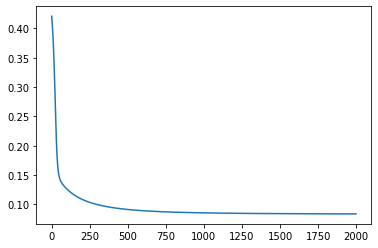

In [14]:
plt.plot(error_list)

### 3.1.2. Neural Network with Multiple Outputs

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat1 = np.random.randn(800, 2) + np.array([0, -3])
cat2 = np.random.randn(800, 2) + np.array([3, 3])
cat3 = np.random.randn(800, 2) + np.array([-3, 3])

X = np.vstack([cat1, cat2, cat3])

labels = np.array([0]*800 + [1]*800 + [2]*800)

y = np.zeros((2400, 3))

for i in range(2400):
    y[i, labels[i]] = 1


In [16]:
print(X.shape)
print(y.shape)


(2400, 2)
(2400, 3)


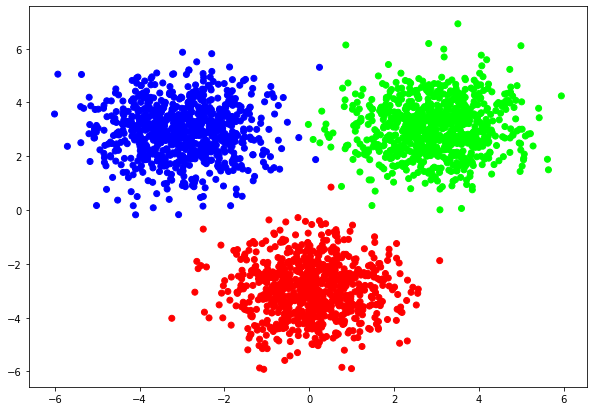

In [17]:
x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)


In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat1 = np.random.randn(800, 2) + np.array([0, -3])
cat2 = np.random.randn(800, 2) + np.array([3, 3])
cat3 = np.random.randn(800, 2) + np.array([-3, 3])


X = np.vstack([cat1, cat2, cat3])

labels = np.array([0]*800 + [1]*800 + [2]*800)

y = np.zeros((2400, 3))

for i in range(2400):
   y[i, labels[i]] = 1
   
   
def define_parameters(weights):
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1):
        
        w = np.random.randn(weights[i], weights[i+1])
        b = np.random.randn()

        weight_list.append(w)
        bias_list.append(b)
    
    return weight_list, bias_list

def softmax(X):
    expX = np.exp(X)
    return expX / expX.sum(axis=1, keepdims=True)

def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))


def predictions(w, b, X):
    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)
    return ao


def find_cost(ao,y):
 
    total_cost = np.sum(-y * np.log(ao))
    return total_cost

def find_derivatives(w, b, X):

    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)

    # Back propagation phase 1


    dcost_dzo = (ao-y)
    dzo_dwo = ah.T
   
    dwo =  np.dot(dzo_dwo,  dcost_dzo)
    dbo = np.sum(dcost_dzo)
    
    # Back propagation phase 2
    
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah

  
    dzo_dah = w[1].T

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)

    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)

    return dwh, dbh, dwo, dbo

def update_weights(w,b,dwh, dbh, dwo, dbo, lr):
    w[0] = w[0] - lr * dwh
    w[1] = w[1] - lr * dwo

    b[0] = b[0] - lr * dbh
    b[1] = b[1] - lr * dbo

    return w, b

def my_multiout_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w,b = define_parameters([input_len, 4, output_len])

    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )
        if i % 50 == 0 :
            print(cost)
            
    return w, b, error_list


lr = 0.0005
epochs = 1000
w, b, error_list = my_multiout_neural_network(X,y,lr,epochs)


3853.4146795964803
163.00490626783093
91.00901347376362
65.95782538495867
53.17770075374088
45.37345108337955
40.063324640867556
36.171363337036226
33.153923400969205
30.70473290348856
28.636616238650873
26.828646873804495
25.201569500673724
23.707615619150502
22.32796019126674
21.069263144391307
19.949810180541736
18.980072060974457
18.153986946567258
17.453656969191034


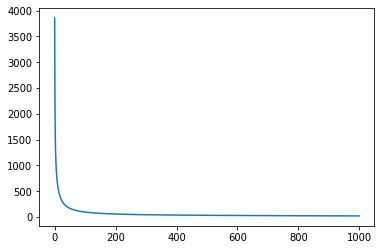

In [19]:
plt.plot(error_list)

### 3.1.3 Neural Network With Tensor Flow Keras Library

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam


In [21]:
iris_data = sns.load_dataset('iris')
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = iris_data.drop(['species'], axis=1)
y = pd.get_dummies(iris_data.species, prefix='output')
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.head()

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
X = X.values
y = y.values


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [27]:
def create_model_multiple_outs(learning_rate, dropout_rate):

    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    adam = Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [28]:
dropout_rate = 0.1
epochs = 50
batch_size = 1
learn_rate = 0.001


In [31]:
model = create_model_multiple_outs(learn_rate, dropout_rate)


In [32]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 1s 10ms/sample - loss: 1.0195 - accuracy: 0.5000 - val_loss: 0.9918 - val_accuracy: 0.5000
Epoch 2/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.8750 - accuracy: 0.6458 - val_loss: 0.8743 - val_accuracy: 0.5000
Epoch 3/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.7610 - accuracy: 0.6562 - val_loss: 0.7246 - val_accuracy: 0.9167
Epoch 4/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.6153 - accuracy: 0.8021 - val_loss: 0.6107 - val_accuracy: 0.9167
Epoch 5/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.5704 - accuracy: 0.7604 - val_loss: 0.5524 - val_accuracy: 0.9167
Epoch 6/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.4623 - accuracy: 0.8125 - val_loss: 0.5189 - val_accuracy: 0.8750
Epoch 7/50
96/96 [==============================] - 0s 1ms/sample - loss: 0.4863 - accuracy: 0.7812 - v

In [33]:
accuracies = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", accuracies[0])
print("Test Accuracy:", accuracies[1])


30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample - loss: 0.0581 - accuracy: 1.0000
Test Score: 0.05808250233530998
Test Accur

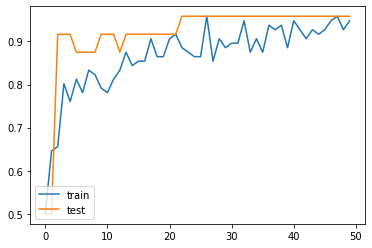

In [34]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')


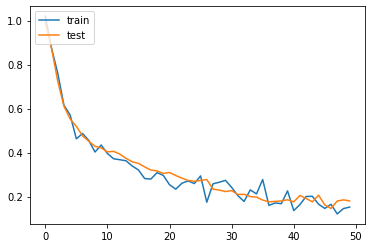

In [35]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')


### 3.2. Convolutional Neural Network

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten, Dropout, MaxPool2D

from tensorflow.keras.models import Model


In [37]:

mnist_data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist_data .load_data()





In [38]:
training_images, test_images = training_images/255.0, test_images/255.0

In [39]:
print(training_images.shape)

(60000, 28, 28)


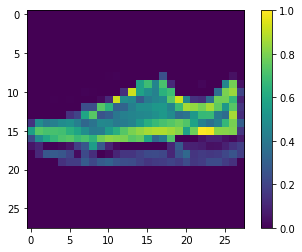

In [40]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()


In [41]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)


(60000, 28, 28, 1)


In [42]:
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)


Number of output classes is:  10


In [43]:
training_images[0].shape

(28, 28, 1)

In [44]:
input_layer = Input(shape = training_images[0].shape )

conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)

maxpool1 = MaxPool2D(2, 2)(conv1)

conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)

flat1 = Flatten()(conv2)

drop1 = Dropout(0.2)(flat1)

dense1 = Dense(512, activation = 'relu')(drop1)

drop2  = Dropout(0.2)(dense1)

output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)


In [45]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [46]:
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/sample - loss: 0.6012 - accuracy: 0.7800 - val_loss: 0.4470 - val_accuracy: 0.8363
Epoch 2/20
60000/60000 [==============================] - 9s 147us/sample - loss: 0.4291 - accuracy: 0.8417 - val_loss: 0.3978 - val_accuracy: 0.8520
Epoch 3/20
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3852 - accuracy: 0.8569 - val_loss: 0.3698 - val_accuracy: 0.8653
Epoch 4/20
60000/60000 [==============================] - 12s 195us/sample - loss: 0.3594 - accuracy: 0.8664 - val_loss: 0.3558 - val_accuracy: 0.8696
Epoch 5/20
60000/60000 [==============================] - 11s 188us/sample - loss: 0.3410 - accuracy: 0.8730 - val_loss: 0.3476 - val_accuracy: 0.8737
Epoch 6/20
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3259 - accuracy: 0.8788 - val_loss: 0.3549 - val_accuracy: 0.8701
Epoch 7/20
60000/60000 [=====================

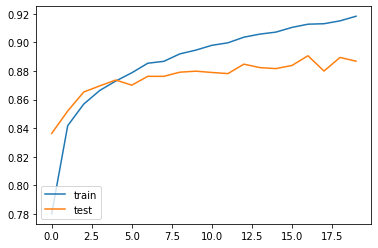

In [47]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')


In [48]:
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)


7


## 3.3. Introduction to RNN

### 3.4.2. Implementing LSTM with Keras

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model


In [58]:
X1 = np.array([x+4 for x in range(0, 160, 4)])
print(X1)

X2 = np.array([x+5 for x in range(0, 200, 5)])
print(X2)


[  4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72
  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140 144
 148 152 156 160]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200]


In [59]:
X = np.column_stack((X1, X2))
print(X)


[[  4   5]
 [  8  10]
 [ 12  15]
 [ 16  20]
 [ 20  25]
 [ 24  30]
 [ 28  35]
 [ 32  40]
 [ 36  45]
 [ 40  50]
 [ 44  55]
 [ 48  60]
 [ 52  65]
 [ 56  70]
 [ 60  75]
 [ 64  80]
 [ 68  85]
 [ 72  90]
 [ 76  95]
 [ 80 100]
 [ 84 105]
 [ 88 110]
 [ 92 115]
 [ 96 120]
 [100 125]
 [104 130]
 [108 135]
 [112 140]
 [116 145]
 [120 150]
 [124 155]
 [128 160]
 [132 165]
 [136 170]
 [140 175]
 [144 180]
 [148 185]
 [152 190]
 [156 195]
 [160 200]]


In [60]:
X = np.array(X).reshape(20, 2, 2)
print(X)


[[[  4   5]
  [  8  10]]

 [[ 12  15]
  [ 16  20]]

 [[ 20  25]
  [ 24  30]]

 [[ 28  35]
  [ 32  40]]

 [[ 36  45]
  [ 40  50]]

 [[ 44  55]
  [ 48  60]]

 [[ 52  65]
  [ 56  70]]

 [[ 60  75]
  [ 64  80]]

 [[ 68  85]
  [ 72  90]]

 [[ 76  95]
  [ 80 100]]

 [[ 84 105]
  [ 88 110]]

 [[ 92 115]
  [ 96 120]]

 [[100 125]
  [104 130]]

 [[108 135]
  [112 140]]

 [[116 145]
  [120 150]]

 [[124 155]
  [128 160]]

 [[132 165]
  [136 170]]

 [[140 175]
  [144 180]]

 [[148 185]
  [152 190]]

 [[156 195]
  [160 200]]]


In [61]:
y = [sum (y) for y in [sum(x) for x in X]]
y = np.array(y)
print(y)


[ 27  63  99 135 171 207 243 279 315 351 387 423 459 495 531 567 603 639
 675 711]


In [62]:
input_layer = Input(shape = (2,2))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
lstm2 = LSTM(50, activation='relu', return_sequences=True)(lstm1)
lstm3 = LSTM(25, activation='relu') (lstm2)
dense1 = Dense(10, activation='relu')(lstm3)
output_layer = Dense(1)(dense1)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')


In [63]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Train on 20 samples
Epoch 1/1000
20/20 [==============================] - 3s 154ms/sample - loss: 179833.7031
Epoch 2/1000
20/20 [==============================] - 0s 346us/sample - loss: 179500.5781
Epoch 3/1000
20/20 [==============================] - 0s 299us/sample - loss: 179090.5312
Epoch 4/1000
20/20 [==============================] - 0s 299us/sample - loss: 178633.0938
Epoch 5/1000
20/20 [==============================] - 0s 249us/sample - loss: 178196.7188
Epoch 6/1000
20/20 [==============================] - 0s 249us/sample - loss: 177922.5938
Epoch 7/1000
20/20 [==============================] - 0s 349us/sample - loss: 177686.5469
Epoch 8/1000
20/20 [==============================] - 0s 249us/sample - loss: 177420.5625
Epoch 9/1000
20/20 [==============================] - 0s 349us/sample - loss: 177103.7812
Epoch 10/1000
20/20 [==============================] - 0s 247us/sample - loss: 176704.9688
Epoch 11/1000
20/20 [==============================] - 0s 299us/sample - loss: 

C:\Users\usman\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


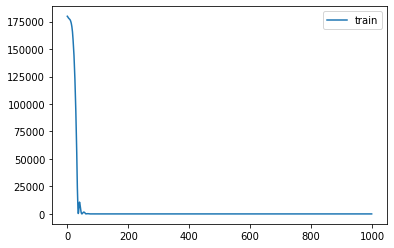

In [64]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.legend(['train'], loc='top right')


In [66]:
X_test = np.array([[200, 225], ## 859
                    [204,230]])
X_test = X_test.reshape((1, 2, 2))
X_test = tf.cast(X_test, tf.float32)
y_pred = model.predict(X_test, verbose=0)
print(y_pred)


[[859.15625]]


## Exercise 3.1

**Question 1:**

In a neural network with three input features, one hidden layer of 5 nodes and an output layer three possible values, what will be the dimensions of weight that connects input to hidden layer. Remember the dimensions of the input data is (m,3) where m is the number of records.

A	[5,3]

B	[3,5]

C	[4,5]

D.	[5,4]

Answer B:


**Question 2:**

The pooling layer is used to pick correct features even if:

A. Image is Inverted

B. Image is distorted

C. Image is compressed

D. All of the above

Answer: D

**Question 3:**

The shape of the feature set passed to the LSTM's input layer should be:

A. Number of Records, Features, Timesteps

B. Timesteps, Features, Number of Records

C. Features, Timesteps, Number of Records

D. Number of Records, Timesteps, Features

Answer: D


## Exercise 3.2

Using the CFAR 10 image dataset, perform image classification to recognize images . Here is the dataset :


In [67]:
cifar_dataset = tf.keras.datasets.cifar10

**Solution:**

In [68]:
(training_images, training_labels), (test_images, test_labels) = cifar_dataset.load_data()

training_images, test_images = training_images/255.0, test_images/255.0

training_labels, test_labels = training_labels.flatten(), test_labels.flatten()
print(training_labels.shape)
print(training_images.shape)

output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)

input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)

maxpool1 = MaxPool2D(2, 2)(conv1)

conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)

#conv3 = Conv2D(128, (3,3), strides = 2, activation= 'relu')(conv2)

flat1 = Flatten()(conv2)

drop1 = Dropout(0.2)(flat1)

dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)

output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)


(50000,)
(50000, 32, 32, 3)
Number of output classes is:  10
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.5644 - accuracy: 0.4328 - val_loss: 1.3537 - val_accuracy: 0.5125
Epoch 2/20
50000/50000 [==============================] - 15s 298us/sample - loss: 1.2913 - accuracy: 0.5393 - val_loss: 1.1588 - val_accuracy: 0.5874
Epoch 3/20
50000/50000 [==============================] - 15s 298us/sample - loss: 1.1734 - accuracy: 0.5832 - val_loss: 1.1110 - val_accuracy: 0.6132
Epoch 4/20
50000/50000 [==============================] - 14s 288us/sample - loss: 1.0856 - accuracy: 0.6170 - val_loss: 1.0145 - val_accuracy: 0.6441
Epoch 5/20
50000/50000 [==============================] - 15s 310us/sample - loss: 1.0144 - accuracy: 0.6390 - val_loss: 0.9893 - val_accuracy: 0.6567
Epoch 6/20
50000/50000 [==============================] - 16s 319us/sample - loss: 0.9523 - accuracy: 0.6651 - val_loss: 0.9443 - val_ac